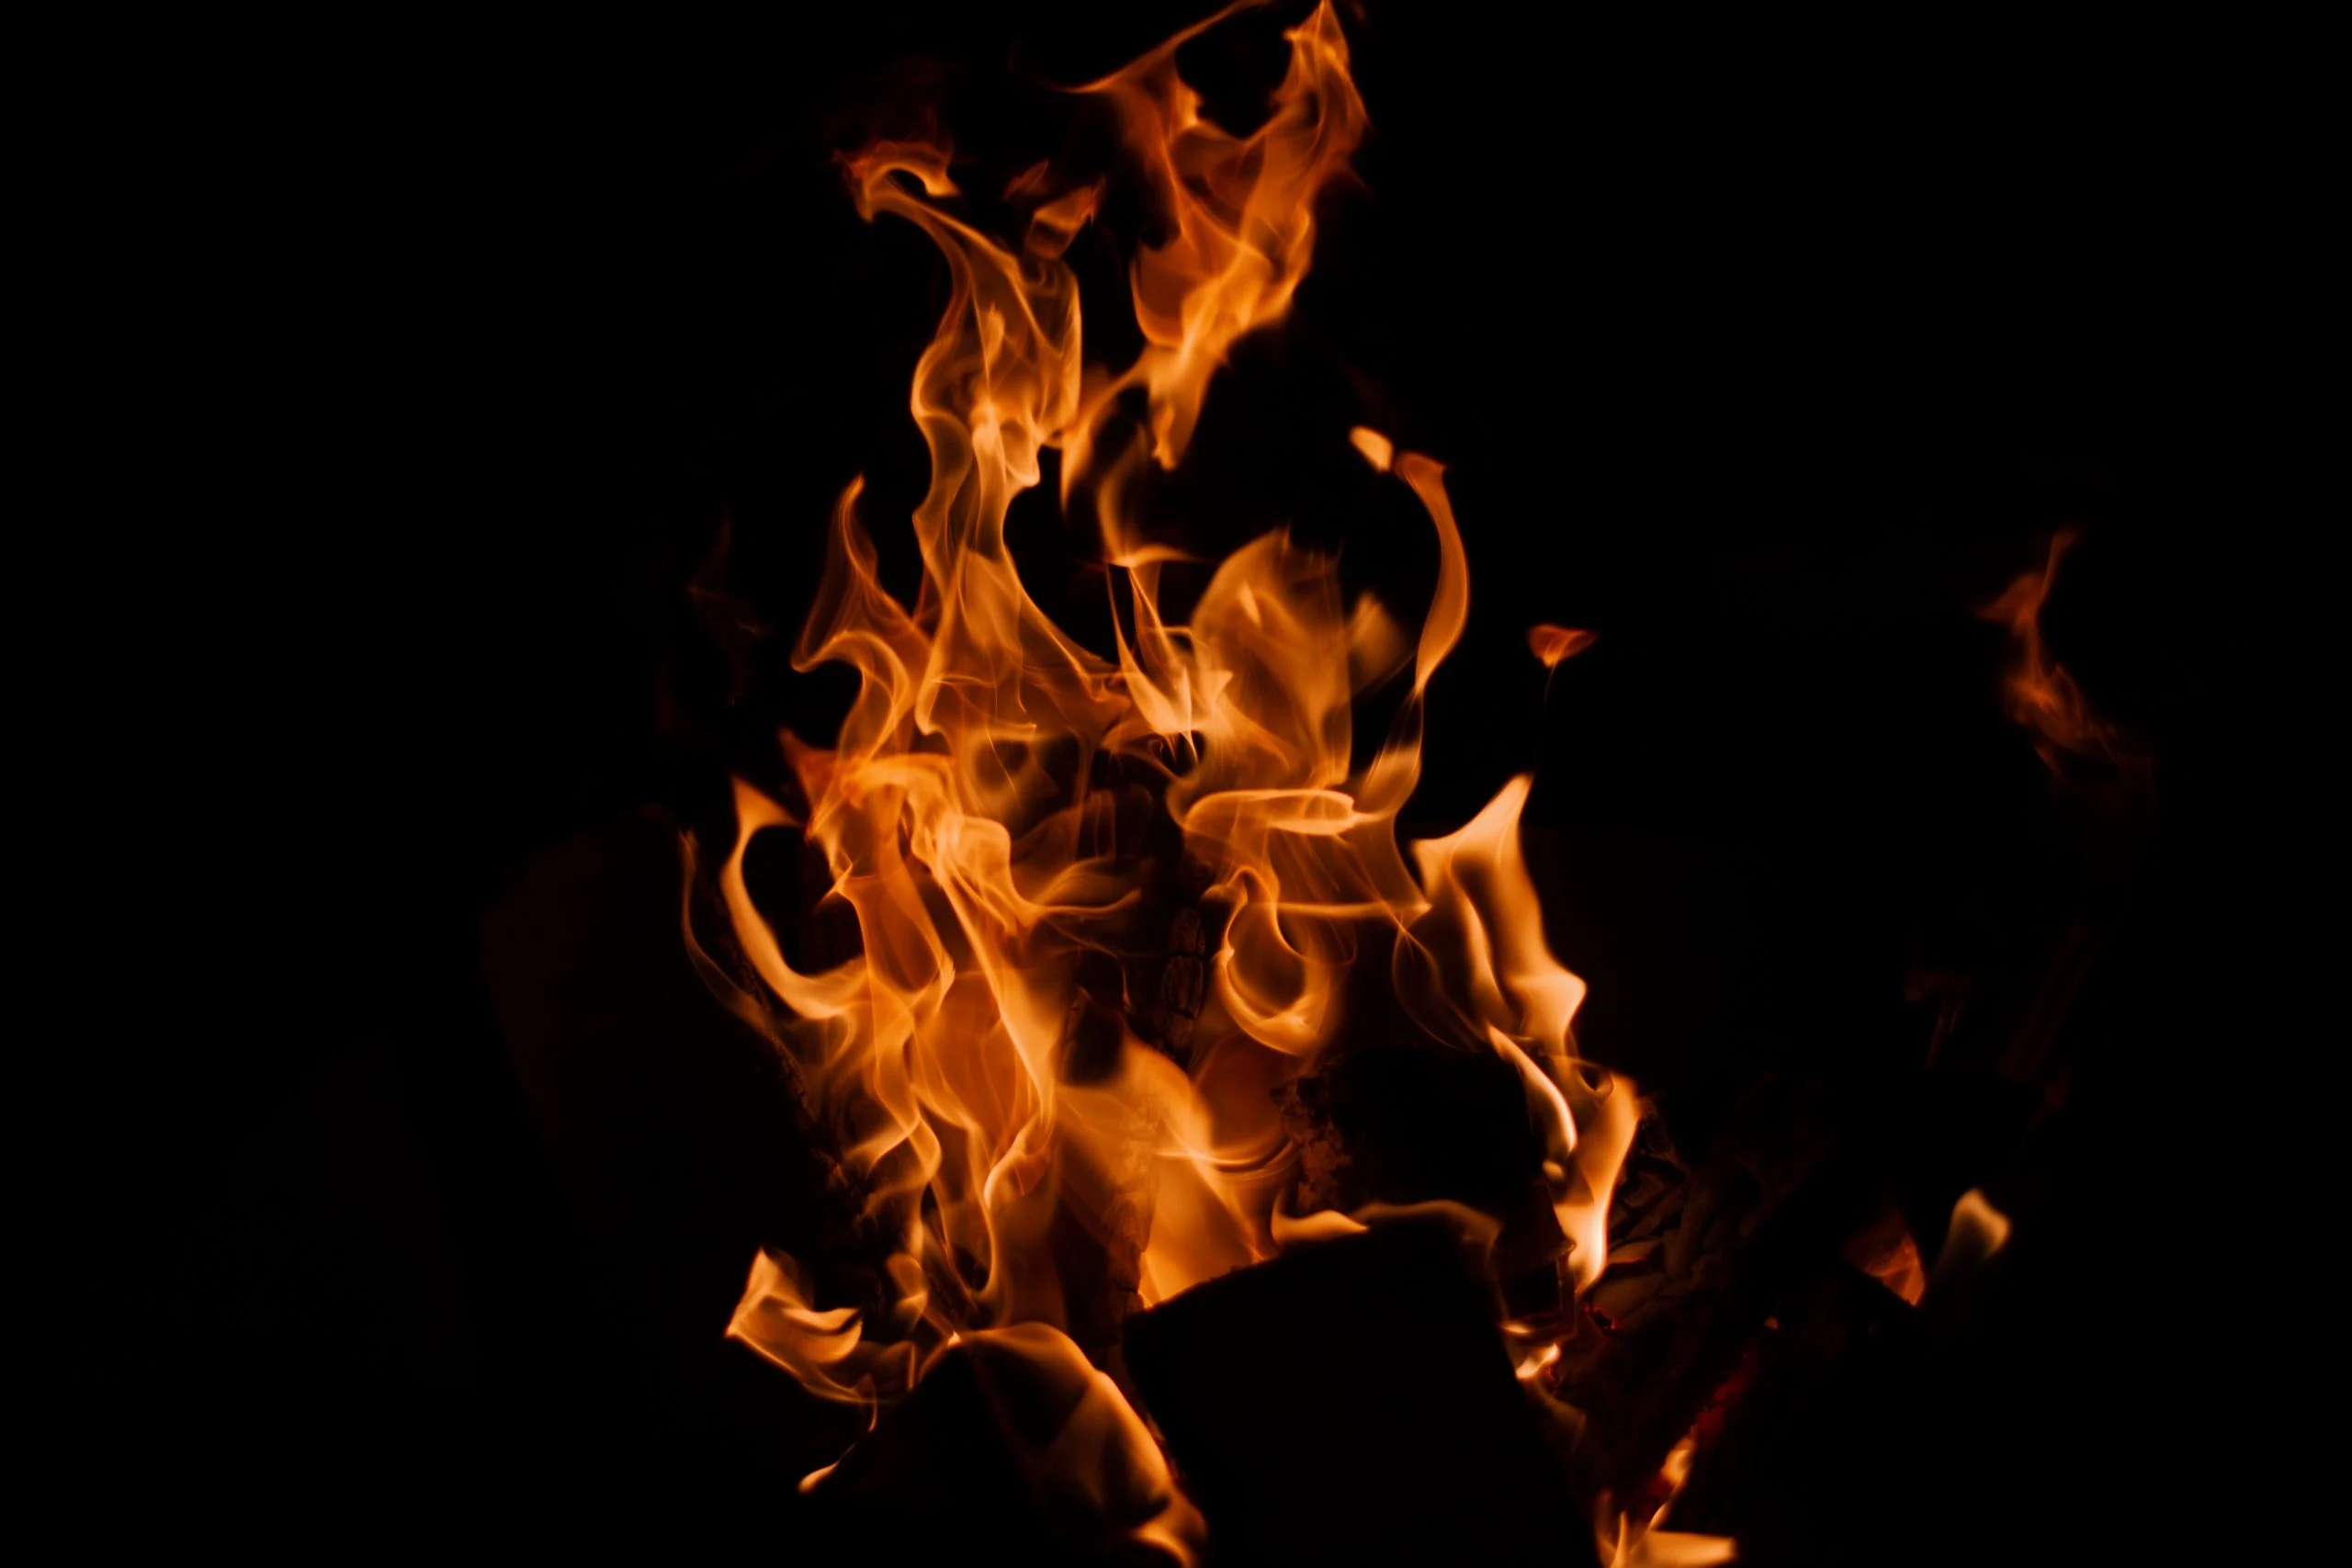

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Acoustic_Extinguisher_Fire_Dataset.xlsx")
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [4]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

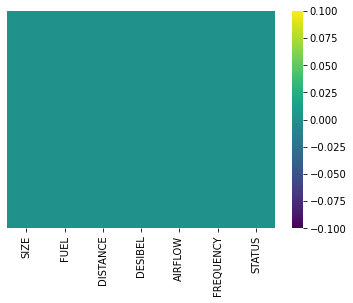

In [5]:
sns.heatmap(df.isna(),yticklabels=False,cmap="viridis")
plt.show()

In [6]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
df.describe(include=["object"])

,FUEL
count,17442
unique,4
top,gasoline
freq,5130


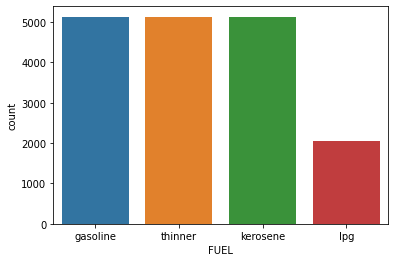

In [8]:
sns.countplot(df["FUEL"])
plt.show()

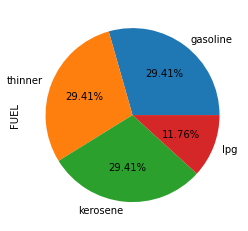

In [9]:
df["FUEL"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

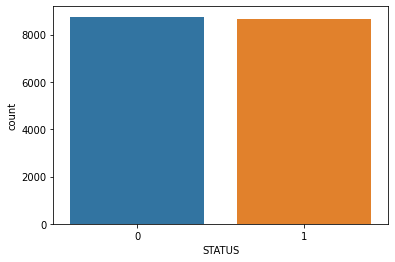

In [10]:
sns.countplot(df["STATUS"])
plt.show()

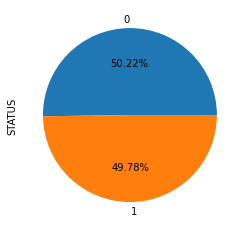

In [11]:
df["STATUS"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
oe=OrdinalEncoder()
df["FUEL"]=oe.fit_transform(df[["FUEL"]])

In [14]:
oe.categories_

[array(['gasoline', 'kerosene', 'lpg', 'thinner'], dtype=object)]

In [15]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.0,10,96,0.0,75,0
1,1,0.0,10,96,0.0,72,1
2,1,0.0,10,96,2.6,70,1
3,1,0.0,10,96,3.2,68,1
4,1,0.0,10,109,4.5,67,1


In [16]:
from scipy.stats import skew

SIZE
Skewness: 0.2786998636581806


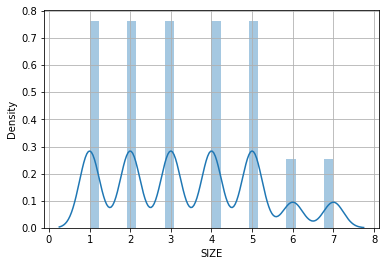

FUEL
Skewness: 0.20959140221588837


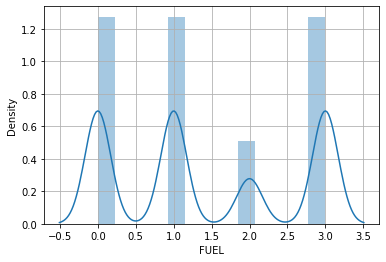

DISTANCE
Skewness: 0.0


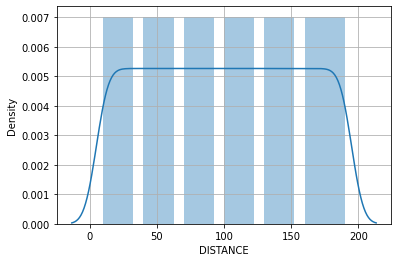

DESIBEL
Skewness: -0.17903195807888958


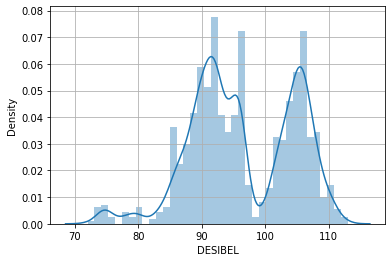

AIRFLOW
Skewness: 0.24434745944124117


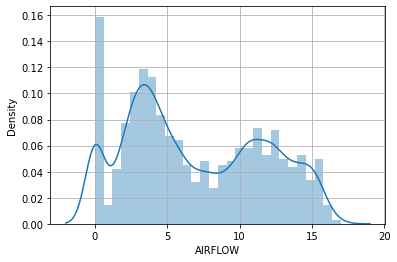

FREQUENCY
Skewness: 0.4348548916349596


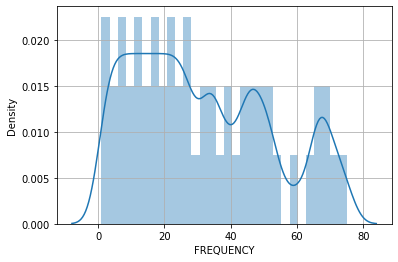

STATUS
Skewness: 0.008714679678955612


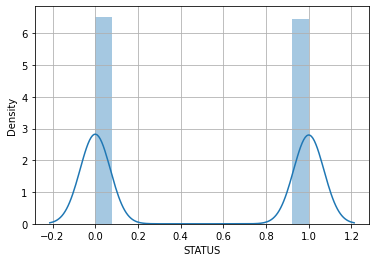

In [17]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

In [18]:
df.corr()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,1.161420e-01,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
FUEL,1.161420e-01,1.000000e+00,-5.956652e-16,-1.383383e-14,-8.832434e-16,-1.081887e-15,-0.019384
DISTANCE,-2.437871e-15,-5.956652e-16,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-1.383383e-14,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-8.832434e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-1.081887e-15,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-1.938442e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


In [19]:
df.corr()["STATUS"].sort_values()

DISTANCE    -0.644051
FREQUENCY   -0.244203
SIZE        -0.096947
FUEL        -0.019384
DESIBEL      0.203970
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

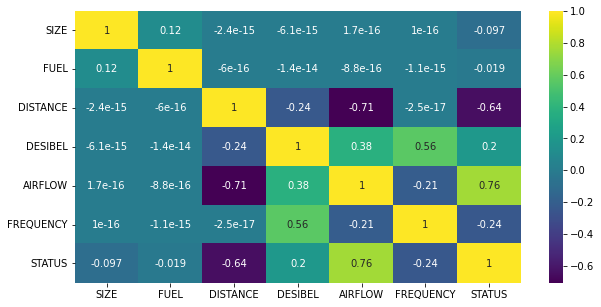

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

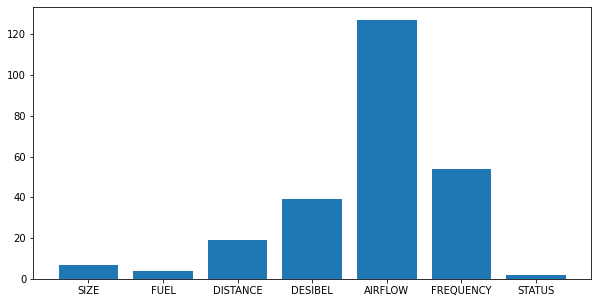

In [21]:
plt.figure(figsize=(10,5))
plt.bar(df.columns,df.nunique())
plt.show()

In [22]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [23]:
x=df.iloc[ : , :-1]
x.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [24]:
y=df.iloc[ : ,-1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [30]:
accuracy_score(ytest,ypred)

0.9598700554175426

In [31]:
confusion_matrix(ytest,ypred)

array([[2553,  111],
       [  99, 2470]])

#### Hyper-Parameter Tuning

In [32]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

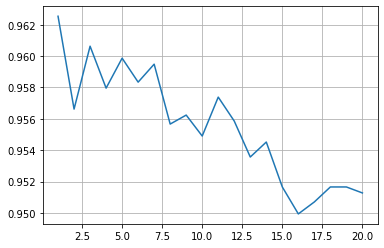

In [33]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [34]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [36]:
accuracy_score(ytest,ypred)

0.9606344353143512

In [37]:
confusion_matrix(ytest,ypred)

array([[2549,  115],
       [  91, 2478]])

#### Cross Validation Score

In [38]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.91917455 0.88449412 0.91284404 0.90338303 0.83400229]
CVS Mean: 0.8907796061540727
CVS Standard Deviation: 0.03070872379372517


#### Bagging

In [39]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [41]:
accuracy_score(ytest,ypred)

0.9600611503917447

In [42]:
confusion_matrix(ytest,ypred)

array([[2549,  115],
       [  94, 2475]])

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.87      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [45]:
accuracy_score(ytest,ypred)

0.8752149818459775

In [46]:
confusion_matrix(ytest,ypred)

array([[2369,  295],
       [ 358, 2211]])

#### Hyper-Parameter Tuning

In [47]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [48]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.876 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.866 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.866 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.869 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [49]:
grid.best_score_

0.8758292089713638

In [50]:
grid.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
grid.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [52]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.87      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [54]:
accuracy_score(ytest,ypred)

0.8752149818459775

In [55]:
confusion_matrix(ytest,ypred)

array([[2369,  295],
       [ 358, 2211]])

#### Cross Validation Score

In [56]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.88764689 0.84895385 0.88302752 0.89048165 0.8125    ]
CVS Mean: 0.8645219839022248
CVS Standard Deviation: 0.0299992468247772


#### Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.88      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [59]:
accuracy_score(ytest,ypred)

0.875788266768584

In [60]:
confusion_matrix(ytest,ypred)

array([[2372,  292],
       [ 358, 2211]])

# Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [62]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2664
           1       0.89      0.84      0.86      2569

    accuracy                           0.87      5233
   macro avg       0.87      0.87      0.87      5233
weighted avg       0.87      0.87      0.87      5233



In [63]:
accuracy_score(ytest,ypred)

0.8671889929294859

In [64]:
confusion_matrix(ytest,ypred)

array([[2391,  273],
       [ 422, 2147]])

#### Cross Validation Score

In [65]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8801949  0.84809401 0.88159404 0.88102064 0.86066514]
CVS Mean: 0.8703137449020645
CVS Standard Deviation: 0.013611260612672553


#### Bagging

In [66]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [67]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2664
           1       0.89      0.83      0.86      2569

    accuracy                           0.87      5233
   macro avg       0.87      0.87      0.87      5233
weighted avg       0.87      0.87      0.87      5233



In [68]:
accuracy_score(ytest,ypred)

0.8669978979552838

In [69]:
confusion_matrix(ytest,ypred)

array([[2392,  272],
       [ 424, 2145]])

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [72]:
accuracy_score(ytest,ypred)

0.9606344353143512

In [73]:
confusion_matrix(ytest,ypred)

array([[2555,  109],
       [  97, 2472]])

#### Hyper-Parameter Tuning

In [74]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9627364800305752 44


In [75]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9621631951079687 1


In [76]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9677049493598319 16


In [77]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9665583795146188 1


In [78]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=23)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [79]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2664
           1       0.96      0.97      0.97      2569

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233



In [80]:
accuracy_score(ytest,ypred)

0.9665583795146188

In [81]:
confusion_matrix(ytest,ypred)

array([[2565,   99],
       [  76, 2493]])

#### Cross Validation Score

In [82]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.82831757 0.82344511 0.87557339 0.90510321 0.84088303]
CVS Mean: 0.8546644631489269
CVS Standard Deviation: 0.031112651056535053


#### Bagging

In [83]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [84]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2664
           1       0.97      0.96      0.96      2569

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233



In [85]:
accuracy_score(ytest,ypred)

0.9652207146952035

In [86]:
confusion_matrix(ytest,ypred)

array([[2588,   76],
       [ 106, 2463]])

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [88]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [89]:
accuracy_score(ytest,ypred)

0.962545385056373

In [90]:
confusion_matrix(ytest,ypred)

array([[2570,   94],
       [ 102, 2467]])

#### Cross Validation Score

In [91]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.91143594 0.85497277 0.90625    0.92803899 0.8440367 ]
CVS Mean: 0.8889468802343407
CVS Standard Deviation: 0.03317985394083083


# Support Vector Classifier

In [92]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [93]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2664
           1       0.94      0.93      0.93      2569

    accuracy                           0.93      5233
   macro avg       0.93      0.93      0.93      5233
weighted avg       0.93      0.93      0.93      5233



In [94]:
accuracy_score(ytest,ypred)

0.9348366137970572

In [95]:
confusion_matrix(ytest,ypred)

array([[2500,  164],
       [ 177, 2392]])

In [96]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [97]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2664
           1       0.89      0.85      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.88      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [98]:
accuracy_score(ytest,ypred)

0.875788266768584

In [99]:
confusion_matrix(ytest,ypred)

array([[2391,  273],
       [ 377, 2192]])

#### Hyper-Parameter Tuning

In [100]:
params={
    "C": np.logspace(-3,3,7),
    "kernel": ["rbf"]
}

In [101]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.885 total time=   7.1s
[CV 2/5] END ...............C=0.001, kernel=rbf;, score=0.876 total time=   7.1s
[CV 3/5] END ...............C=0.001, kernel=rbf;, score=0.873 total time=   7.1s
[CV 4/5] END ...............C=0.001, kernel=rbf;, score=0.869 total time=   7.0s
[CV 5/5] END ...............C=0.001, kernel=rbf;, score=0.879 total time=   7.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.898 total time=   3.2s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.890 total time=   3.2s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.882 total time=   3.1s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.881 total time=   3.2s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.888 total time=   3.2s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.920 total time=   1.9s
[CV 2/5] END .................C=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf']},
             verbose=3)

In [102]:
grid.best_score_

0.9656812821909094

In [103]:
grid.best_params_

{'C': 1000.0, 'kernel': 'rbf'}

In [104]:
grid.best_estimator_

SVC(C=1000.0)

In [105]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [106]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2664
           1       0.96      0.97      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [107]:
accuracy_score(ytest,ypred)

0.9638830498757882

In [108]:
confusion_matrix(ytest,ypred)

array([[2560,  104],
       [  85, 2484]])

#### Cross Validation Score

In [109]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.90455718 0.89051304 0.91026376 0.91771789 0.83486239]
CVS Mean: 0.8915828514781712
CVS Standard Deviation: 0.02972778363873417


#### Bagging

In [110]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [111]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [112]:
accuracy_score(ytest,ypred)

0.9642652398241927

In [113]:
confusion_matrix(ytest,ypred)

array([[2574,   90],
       [  97, 2472]])

# Voting Classifier

In [114]:
models=[]
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
models.append(("LogisticRegression", LogisticRegression()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("SVC", SVC()))

In [115]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [116]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2664
           1       0.96      0.93      0.94      2569

    accuracy                           0.95      5233
   macro avg       0.95      0.95      0.95      5233
weighted avg       0.95      0.95      0.95      5233



In [117]:
confusion_matrix(ytest,ypred)

array([[2572,   92],
       [ 186, 2383]])

In [118]:
accuracy_score(ytest,ypred)

0.9468755971717944

# Boosting

###### AdaBoostClassifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2664
           1       0.93      0.92      0.92      2569

    accuracy                           0.92      5233
   macro avg       0.92      0.92      0.92      5233
weighted avg       0.92      0.92      0.92      5233



In [120]:
accuracy_score(ytest,ypred)

0.9229887253965221

In [121]:
confusion_matrix(ytest,ypred)

array([[2474,  190],
       [ 213, 2356]])

###### Gradient Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2664
           1       0.95      0.94      0.94      2569

    accuracy                           0.94      5233
   macro avg       0.94      0.94      0.94      5233
weighted avg       0.94      0.94      0.94      5233



In [123]:
accuracy_score(ytest,ypred)

0.9428626027135486

In [124]:
confusion_matrix(ytest,ypred)

array([[2530,  134],
       [ 165, 2404]])

###### XG Boosting

In [125]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(xtrain, ytrain)
ypred = xg.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2664
           1       0.95      0.93      0.94      2569

    accuracy                           0.94      5233
   macro avg       0.94      0.94      0.94      5233
weighted avg       0.94      0.94      0.94      5233



In [126]:
accuracy_score(ytest,ypred)

0.9396139881521116

In [127]:
confusion_matrix(ytest,ypred)

array([[2525,  139],
       [ 177, 2392]])

# Deep Learning- Artificial Neural Network

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [136]:
ann=Sequential()

ann.add(Dense(units=6,activation="relu"))
ann.add(Dense(units=3,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

ann.fit(xtrain,ytrain,epochs=1000,validation_data=(xtest,ytest),batch_size=200)

Epoch 1/1000
62/62 [==============================] - 2s 9ms/step - loss: 0.6650 - accuracy: 0.6295 - val_loss: 0.6366 - val_accuracy: 0.7279
Epoch 2/1000
62/62 [==============================] - 0s 5ms/step - loss: 0.6048 - accuracy: 0.7749 - val_loss: 0.5716 - val_accuracy: 0.8009
Epoch 3/1000
62/62 [==============================] - 0s 5ms/step - loss: 0.5298 - accuracy: 0.8250 - val_loss: 0.4874 - val_accuracy: 0.8380
Epoch 4/1000
62/62 [==============================] - 0s 5ms/step - loss: 0.4405 - accuracy: 0.8545 - val_loss: 0.3994 - val_accuracy: 0.8601
Epoch 5/1000
62/62 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.8710 - val_loss: 0.3339 - val_accuracy: 0.8699
Epoch 6/1000
62/62 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8795 - val_loss: 0.2971 - val_accuracy: 0.8754
Epoch 7/1000
62/62 [==============================] - 0s 5ms/step - loss: 0.2792 - accuracy: 0.8830 - val_loss: 0.2772 - val_accuracy: 0.8809
Epoch 

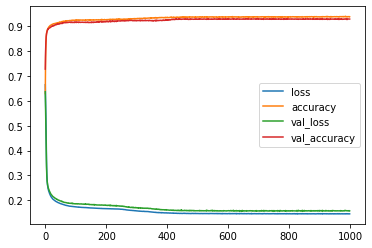

In [137]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [138]:
ypred=ann.predict(xtest)

In [139]:
ypred=ypred>0.5

In [140]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2664
           1       0.93      0.93      0.93      2569

    accuracy                           0.93      5233
   macro avg       0.93      0.93      0.93      5233
weighted avg       0.93      0.93      0.93      5233



In [142]:
accuracy_score(ytest,ypred)

0.9294859545193961

In [143]:
confusion_matrix(ytest,ypred)

array([[2485,  179],
       [ 190, 2379]])

# Summary

###### The Accuracy achieved per model is as follows:

Model name: KNN
    - Initial Accuracy: 95.98%,
    - Accuracy Post Hyper-parameter Tuning: 96.06%,
    - Cross Validation Score: 89.07%,
    - Bagging Accuracy: 96.00%,
    - Best Accuracy Achieved: 96.06%
        
        
Model name: Logistic Regression
    - Initial Accuracy: 87.52%,
    - Accuracy Post Hyper-parameter Tuning: 87.52%,
    - Cross Validation Score: 86.45%,
    - Bagging Accuracy: 87.57%,
    - Best Accuracy Achieved: 87.57%

        
Model name: Naive Bayes
    - Initial Accuracy: 86.72%,
    - Cross Validation Score: 87.03%,
    - Bagging Accuracy: 86.69%,    
    - Best Accuracy Achieved: 86.72%

        
Model name: Decision Tree
    - Initial Accuracy: 96.06%,
    - Accuracy Post Hyper-parameter Tuning: 96.65%,
        Criterion Gini:
            Max Depth best Accuracy- 96.29%,
            Min Samples Leaf best Accuracy- 96.00%,
        Criterion Entropy:
            Max Depth best Accuracy- 96.81%,
            Min Samples Leaf best Accuracy- 96.69%,
    - Cross Validation Score: 85.46%,
    - Bagging Accuracy: 96.52%,
    - Best Accuracy Achieved: 96.65%

        
Model name: Random Forest
    - Initial Accuracy: 96.25%,
    - Cross Validation Score: 88.89%,
    - Best Accuracy Achieved: 96.25%
        

Model name: Support Vector Classifier
    - Initial Accuracy: 
        Kernel "rbf"- 93.48%,
        Kernel "linear"- 87.57%,
    - Accuracy Post Hyper-parameter Tuning: 96.38%,
    - Cross Validation Score: 89.15%,
    - Bagging Accuracy: 96.42%,
    - Best Accuracy Achieved: 96.42%
        
        
Voting Classifier Accuracy: 94.68%


Boosting:
    - Ada Boosting: 92.29%,
    - Gradient Boosting: 94.28%,
    - XG Boosting: 93.96%,
    
    
Deep Learning- Artificial Neural Network
    - Best Accuracy: 93.00%